In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

df = pd.read_pickle("results/system0.pkl")
df.head()

,Category,Value
0,$CO_{2}$ Concentration,5826.293308
1,Electrolysis,96387.184731
2,Hydrogenation,2963.660743
3,MTO,976.063756


C:\Users\Peter\AppData\Local\Temp\ipykernel_9132\4224620517.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Value', y='Category', ax=ax, data=df, palette=palette, orient='y')


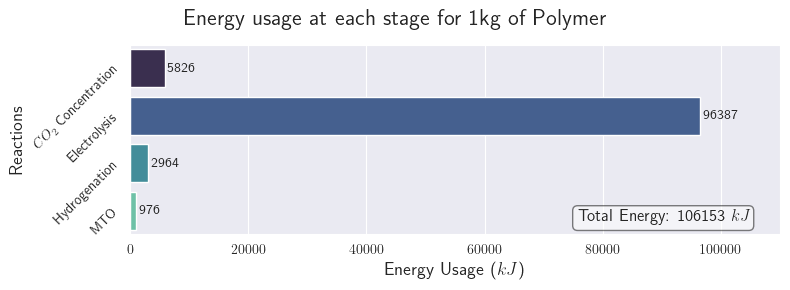

In [49]:
sns.set_style("darkgrid")
palette = sns.color_palette("mako", len(df))
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'')
# Choose a palette

# Create a barplot
fig, ax = plt.subplots(figsize=(8, 3))

sns.barplot(x='Value', y='Category', ax=ax, data=df, palette=palette, orient='y')
fig.suptitle("Energy usage at each stage for 1kg of Polymer", fontsize=16, y=0.95)
ax.set_xlabel("Energy Usage ($kJ$)", fontsize=13)
ax.set_ylabel("Reactions", fontsize=13)
ax.set_xlim((0, 110000))
plt.yticks(rotation=45)

total = round(df['Value'].sum())

for p in ax.patches:
    width = p.get_width()  # Get the width of the bar (which is now the 'value')
    ax.text(width + 500,  # Set the text slightly to the right of the bar end
            p.get_y() + p.get_height() / 2,  # Set the text at the vertical center of the bar
            '{:1.0f}'.format(width),  # The value to be displayed
            va='center')  # Center the text vertically

text_content = f"Total Energy: {total} $kJ$"
text_x, text_y = total * 0.85, 3
# Adding the text with background using bbox
text = ax.text(text_x, text_y, text_content, fontsize=12, ha='center', va='top',
               bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1, alpha=0.5))

plt.tight_layout()
plt.show()